**Learning**:
- What is the difference between `.fit`, `.transform()`, and `.fit_transform()`? Why do we use `.fit_transform()` with a training data, but `.transform()` with a test data?
    - @Todo
- What and how to use `Tfidfvectorizer`?
    - @Todo
    - [Natural Language Processing|TF-IDF Intuition| Text Prerocessing](https://www.youtube.com/watch?v=D2V1okCEsiE&ab_channel=KrishNaik)
- Models
    - [Decision Tree](https://www.youtube.com/watch?v=ZVR2Way4nwQ&ab_channel=NormalizedNerd)
    - [Random Forest](https://www.youtube.com/watch?v=v6VJ2RO66Ag&ab_channel=NormalizedNerd)
    - [Bagging Classifier](https://www.geeksforgeeks.org/ml-bagging-classifier/)
    - SVM (support vector machine): @Todo
    - [Naive Bayes](https://www.youtube.com/watch?v=Q8l0Vip5YUw&ab_channel=Serrano.Academy): @Todo
    

**Import important libraries**

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud

# read inputs from file to a data frame
import pandas as pd

# preprocessing data
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer

# models
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, BaggingClassifier, ExtraTreesClassifier, GradientBoostingClassifier

# evaluate model
from sklearn.metrics import accuracy_score, precision_score

**Load Dataset**

In [3]:
df = pd.read_csv('/kaggle/input/spam-email/spam.csv')

**Analise Data**

In [4]:
# check data
df.head()

,Category,Message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [5]:
# check info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Category  5572 non-null   object
 1   Message   5572 non-null   object
dtypes: object(2)
memory usage: 87.2+ KB


In [6]:
# check shape of data
df.shape

(5572, 2)

In [7]:
# check description
df.describe()

,Category,Message
count,5572,5572
unique,2,5157
top,ham,"Sorry, I'll call later"
freq,4825,30


In [8]:
# check missing values
df.isnull().sum()

Category    0
Message     0
dtype: int64

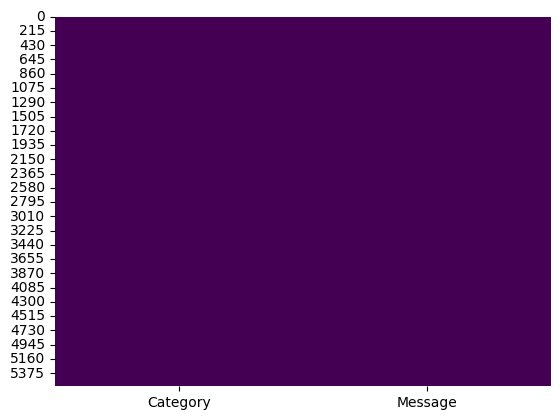

In [9]:
sns.heatmap(df.isnull(), cmap='viridis', cbar=False)
plt.show()

In [10]:
# check value count
df['Category'].value_counts()

Category
ham     4825
spam     747
Name: count, dtype: int64

<BarContainer object of 2 artists>

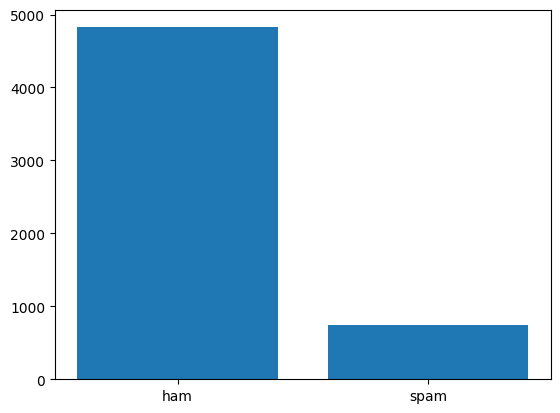

In [11]:
# visualize data
plt.bar(['ham', 'spam'], df['Category'].value_counts())

<Axes: ylabel='count'>

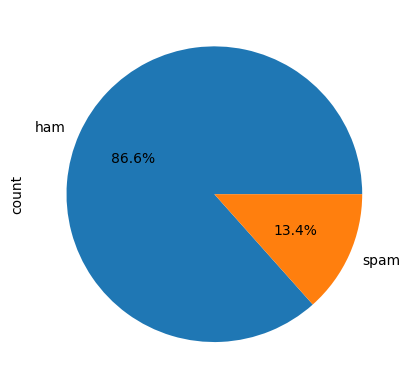

In [12]:
# draw pie chart
df['Category'].value_counts().plot(kind='pie', autopct='%1.1f%%')

In [13]:
# check Message column
df['Message']

0       Go until jurong point, crazy.. Available only ...
1                           Ok lar... Joking wif u oni...
2       Free entry in 2 a wkly comp to win FA Cup fina...
3       U dun say so early hor... U c already then say...
4       Nah I don't think he goes to usf, he lives aro...
                              ...                        
5567    This is the 2nd time we have tried 2 contact u...
5568                 Will ü b going to esplanade fr home?
5569    Pity, * was in mood for that. So...any other s...
5570    The guy did some bitching but I acted like i'd...
5571                           Rofl. Its true to its name
Name: Message, Length: 5572, dtype: object

**Preprocess Data**

In [14]:
# check duplicates in Message
df.duplicated(subset='Message').sum()

415

In [15]:
# drop duplicates (keep first)
df.drop_duplicates(keep='first', inplace=True)
df.duplicated(subset='Message').sum()

0

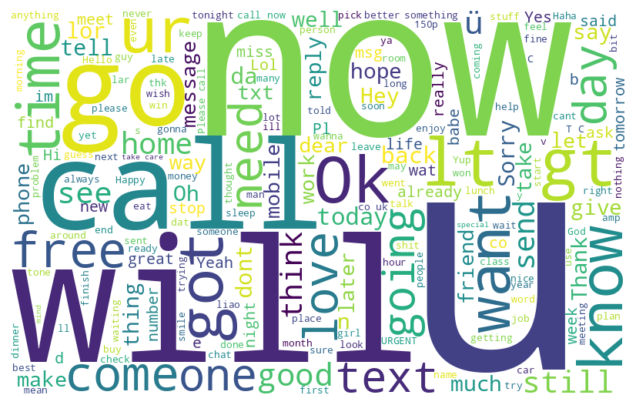

In [16]:
# check wordcloud
text=' '.join(df['Message']) # join all messages with a space in between
wordcloud = WordCloud(width=800, height=500, background_color='white').generate(text)
plt.figure(figsize=(10,5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

In [17]:
# change text into lower
df['Message'] = df['Message'].str.lower()
df['Message']

0       go until jurong point, crazy.. available only ...
1                           ok lar... joking wif u oni...
2       free entry in 2 a wkly comp to win fa cup fina...
3       u dun say so early hor... u c already then say...
4       nah i don't think he goes to usf, he lives aro...
                              ...                        
5567    this is the 2nd time we have tried 2 contact u...
5568                 will ü b going to esplanade fr home?
5569    pity, * was in mood for that. so...any other s...
5570    the guy did some bitching but i acted like i'd...
5571                           rofl. its true to its name
Name: Message, Length: 5157, dtype: object

In [18]:
# encode data
df['Category'] = df['Category'].map({'ham': 1, 'spam': 0})
df['Category'].value_counts()

Category
1    4516
0     641
Name: count, dtype: int64

Machine Learning:

In [19]:
# split data into X and y
X = df['Message']
y = df['Category']

In [27]:
# split data into training set and testing set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print(X_train)

# initialize the TF-IDF vectorizer
# to transform text into a meaningful representation of numbers which is used to fit machine algorithm for prediction
vectorizer = TfidfVectorizer()

# fit the vectorize on the training data and transform the training data
X_train = vectorizer.fit_transform(X_train)
print(X_train)

# transform the test data using the same vectorizer
X_test = vectorizer.transform(X_test)

2598    got fujitsu, ibm, hp, toshiba... got a lot of ...
5418    so how are you really. what are you up to. how...
99                        i see a cup of coffee animation
2321        this pain couldn't have come at a worse time.
2388                               also where's the piece
                              ...                        
4750    thanx u darlin!im cool thanx. a few bday drink...
474     want 2 get laid tonight? want real dogging loc...
3273    moon has come to color your dreams, stars to m...
4022                we have to pick rayan macleran there.
882     see, i knew giving you a break a few times wou...
Name: Message, Length: 4125, dtype: object
  (0, 5794)	0.23079498194196668
  (0, 6798)	0.09733443504478942
  (0, 3468)	0.17254300299680023
  (0, 4471)	0.3227086369361624
  (0, 4793)	0.14814048130473126
  (0, 4143)	0.2653496285258359
  (0, 6856)	0.38445201166469484
  (0, 3474)	0.38445201166469484
  (0, 3523)	0.38445201166469484
  (0, 2994)	0.3663932322226119
  

In [21]:
# create models
bc = BaggingClassifier(n_estimators=50, random_state=42)
etc = ExtraTreesClassifier(n_estimators=50, random_state=42)
gbdt = GradientBoostingClassifier(n_estimators=50, random_state=42)
xgb = XGBClassifier(n_estimators=50, random_state=42)
svc = SVC(kernel="sigmoid", gamma=1.0)
mnb = MultinomialNB()
dtc = DecisionTreeClassifier(max_depth=10)
lrc = LogisticRegression(solver='liblinear', penalty='l1')
rfc = RandomForestClassifier(n_estimators=50, random_state=42)
abc = AdaBoostClassifier(n_estimators=50, random_state=42)

models = {
    'BGC': bc,
    'ETC': etc,
    'GBDT': gbdt,
    'xgb': xgb,
    'SVC': svc,
    'NB': mnb,
    'DT': dtc,
    'LR': lrc,
    'RF': rfc,
    'Adaboost': abc
}

In [30]:
# train models
def train_classifier(model, X_train, y_train, X_test, y_test):
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    return accuracy, precision

In [33]:
%%time
# evaluate os resources (calculation time)

# save scores
accuracy_scores = []
precision_scores = []

# iterate over the items in the clfs dictionary
for name, model in models.items():
    current_accuracy, current_precision = train_classifier(model, X_train, y_train, X_test, y_test)
    rounded_accuracy = round(current_accuracy, 2)
    rounded_precision = round(current_precision, 2)
    
    print()
    print("For: ", name)
    print("Accuracy: ", rounded_accuracy)
    print("Precision: ", rounded_precision)

    accuracy_scores.append(rounded_accuracy)
    precision_scores.append(rounded_precision)


For:  BGC
Accuracy:  0.96
Precision:  0.97

For:  ETC
Accuracy:  0.98
Precision:  0.98

For:  GBDT
Accuracy:  0.95
Precision:  0.96

For:  xgb
Accuracy:  0.97
Precision:  0.98

For:  SVC
Accuracy:  0.99
Precision:  0.99

For:  NB
Accuracy:  0.95
Precision:  0.95

For:  DT
Accuracy:  0.96
Precision:  0.97

For:  LR
Accuracy:  0.96
Precision:  0.97

For:  RF
Accuracy:  0.98
Precision:  0.98

For:  Adaboost
Accuracy:  0.97
Precision:  0.97
CPU times: user 17.2 s, sys: 16 ms, total: 17.2 s
Wall time: 15 s


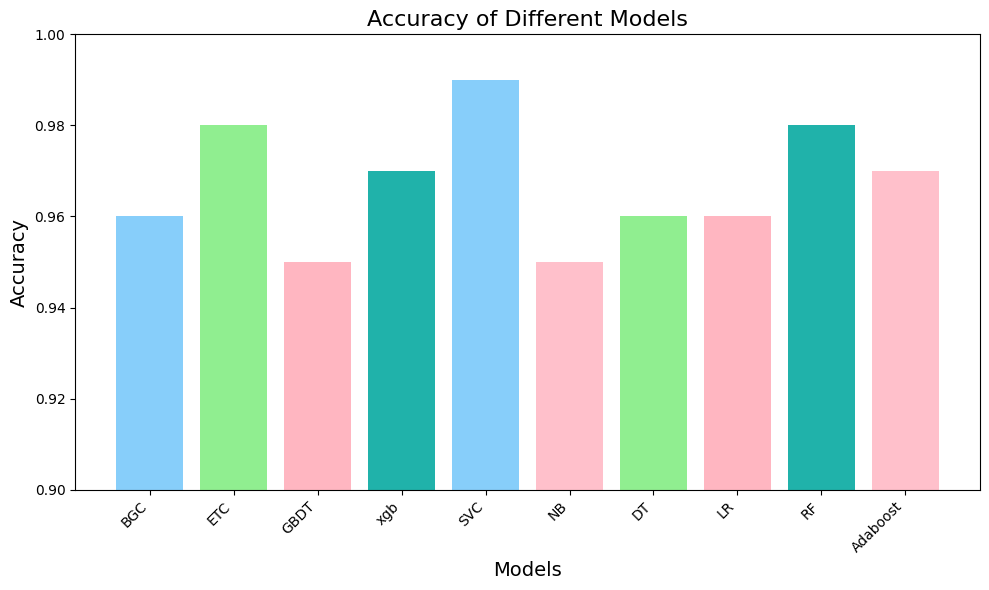

In [37]:
# visualize models' performance
color = ['lightskyblue', 'lightgreen', 'lightpink', 'lightseagreen',
                 'lightskyblue', 'pink', 'lightgreen', 'lightpink', 'lightseagreen', 'pink']

# Plot
plt.figure(figsize=(10, 6))
plt.bar(models.keys(), accuracy_scores, color=color)
plt.xlabel('Models', fontsize=14)
plt.ylabel('Accuracy', fontsize=14)
plt.title('Accuracy of Different Models', fontsize=16)
plt.xticks(rotation=45, ha='right')
plt.ylim(0.9, 1)  # Set the y-axis limits for better visualization
plt.tight_layout()
plt.show()